In [1]:
# import libraries
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mc
import matplotlib.patches as mpatches
import datetime as dt
import matplotlib.colorbar as cbar
import seaborn as sns
from scipy import stats
import cartopy.crs as ccrs
%matplotlib inline

In [50]:
# load Dataset
file_T = '/g/data/rq0/level_2/73/RAINRATE/73_20200101_rainrate.nc' # radar station no.73 (Townsville)
print('file Townsville: ',file_T)
file_C = '/g/data/rq0/level_2/19/RAINRATE/19_20200101_rainrate.nc' # radar station no.19 (Cairns)
print('file Cairns: ',file_C)
file_W = '/g/data/rq0/level_2/41/RAINRATE/41_20200101_rainrate.nc' # radar station no.41 (Willis Island)
print('file Willis Island: ',file_W)
# open datasets
ds_T = xr.open_dataset(file_T, engine="netcdf4")
ds_C = xr.open_dataset(file_C, engine="netcdf4")
ds_W = xr.open_dataset(file_W, engine="netcdf4")
ds_C["rainrate"]
ds_C.time[204]
maskC = (ds_C['isfile'] == 1)
maskT = (ds_T['isfile'] == 1)
maskW = (ds_W['isfile'] == 1)

file Townsville:  /g/data/rq0/level_2/73/RAINRATE/73_20200101_rainrate.nc
file Cairns:  /g/data/rq0/level_2/19/RAINRATE/19_20200101_rainrate.nc
file Willis Island:  /g/data/rq0/level_2/41/RAINRATE/41_20200101_rainrate.nc


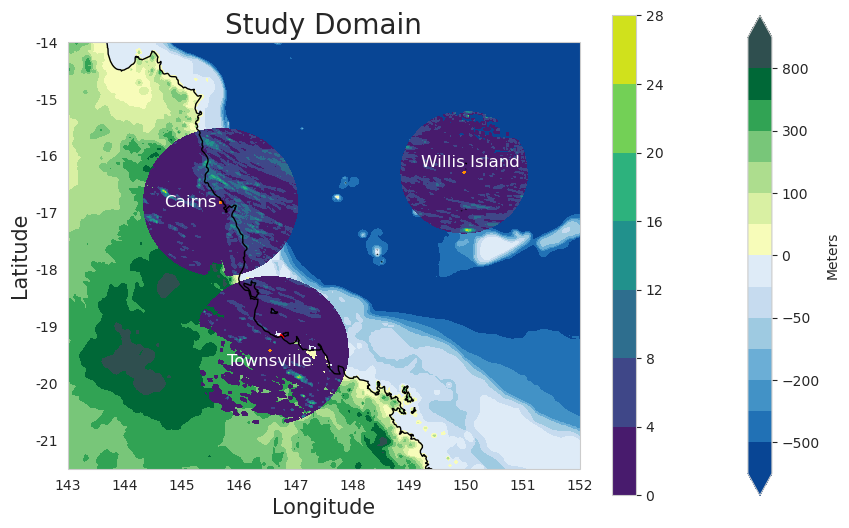

In [46]:
ds_full = xr.open_dataset('/home/563/ac9768/Aus_Bathymetry/ETOPO2v2c_f4.GQp62nWv.nc.part',engine="netcdf4")
ds = ds_full.sel(x=slice(140,155),y=slice(-22,-11))
lon = np.linspace(min(ds['x'].data), max(ds['x'].data), len(ds['x'].data))
lat = np.linspace(min(ds['y'].data), max(ds['y'].data), len(ds['y'].data))

lon, lat = np.meshgrid(lon, lat)
dem = ds['z'].data

fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8],projection=ccrs.PlateCarree())
ax.coastlines()

color = ['#084594', '#2171b5', '#4292c6', '#6baed6', '#9ecae1', '#c6dbef', '#deebf7', '#f7fcb9','#d9f0a3','#addd8e',
         '#78c679','#31a354','#006837','darkslategrey','#d7ccca']
levels = [-8000, -6000, -4000, -2000, -1000, -200, -50, 0, 50, 200, 500, 1000, 1500, 2000, 3000, 4000, 5000, 6000, 7000, 8000]
levels = [-800, -500, -300, -200, -100, -50, -25, 0, 50, 100, 200, 300, 500, 800, 1000]

cs = ax.contourf(lon,lat,dem,levels=levels,extend="both",colors=color)
cb = plt.colorbar(cs,aspect=20,orientation='vertical',ax=ax)
cb.set_label("Meters")
ax.set_title("Study Domain",fontsize=20)
ax.set_xlim([143,152])
ax.set_xticks([143,144,145,146,147,148,149,150,151,152])
ax.set_xticklabels([143,144,145,146,147,148,149,150,151,152])
ax.set_ylim([-21.5,-14])
ax.set_yticks([-21,-20,-19,-18,-17,-16,-15,-14])
ax.set_yticklabels([-21,-20,-19,-18,-17,-16,-15,-14])
circle_T_center = mpatches.Circle((146.5509,-19.4198),0.1,alpha=1,fc="darkorange") # Townsville 
circle_C_center = mpatches.Circle((145.683,-16.817),0.1,alpha=0.8,fc="darkorange") # Cairns 
circle_W_center = mpatches.Circle((149.9646,-16.2874),0.1,alpha=1,fc="darkorange") # Willis Island 
circle_T_station = mpatches.RegularPolygon((146.77,-19.25), numVertices=3,radius=0.2,alpha=1,fc="red") # Townsville station
circle_C_station = mpatches.RegularPolygon((145.75,-16.87), numVertices=3,radius=0.2,alpha=1,fc="red") # Cairns station
circle_T = mpatches.Circle((146.5509,-19.4198),1.358,alpha=0.4,fc="grey") # Townsville
circle_C = mpatches.Circle((145.683,-16.817),1.358,alpha=0.4,fc="grey") # Cairns
circle_W = mpatches.Circle((149.9646,-16.2874),1.358,alpha=0.4,fc="grey") # Willis Island

# plot gbr locations
# ax.scatter(coordinates[:, 0], coordinates[:, 1], color='purple', marker='o',s=0.3)

# ax.add_patch(circle_T)
# ax.add_patch(circle_C)
# ax.add_patch(circle_W)

ax.add_patch(circle_T_station)
ax.add_patch(circle_C_station)
ax.add_patch(circle_T_center)
ax.add_patch(circle_C_center)
ax.add_patch(circle_W_center)
ax.set_xlabel("Longitude",fontsize=15)
ax.set_ylabel("Latitude",fontsize=15) 
ax.annotate("Townsville",(145.8,-19.7),color='white',fontsize=12)
ax.annotate("Cairns",(144.7,-16.9),color='white',fontsize=12)
ax.annotate("Willis Island",(149.2,-16.2),color='white',fontsize=12)
# radar_field(lon_T,lon_C,lon_W,lat_T,lat_C,lat_W,ds_T.rainrate.where(maskT,drop=True).mean(dim="time"),
            # ds_C.rainrate.where(maskC,drop=True).mean(dim="time"),ds_W.rainrate.where(maskW,drop=True).mean(dim="time"),
           # "viridis",dBZ,ds_T.time[200].values,ds_T.time[200].values)
cf=ax.contourf(lon_T,lat_T,ds_T.rainrate.where(maskT,drop=True).mean(dim="time"),alpha=1,cmap="viridis")
ax.contourf(lon_C,lat_C,ds_C.rainrate.where(maskC,drop=True).mean(dim="time"),alpha=1,cmap="viridis")
ax.contourf(lon_W,lat_W,ds_W.rainrate.where(maskW,drop=True).mean(dim="time"),alpha=1,cmap="viridis")
plt.colorbar(cf)

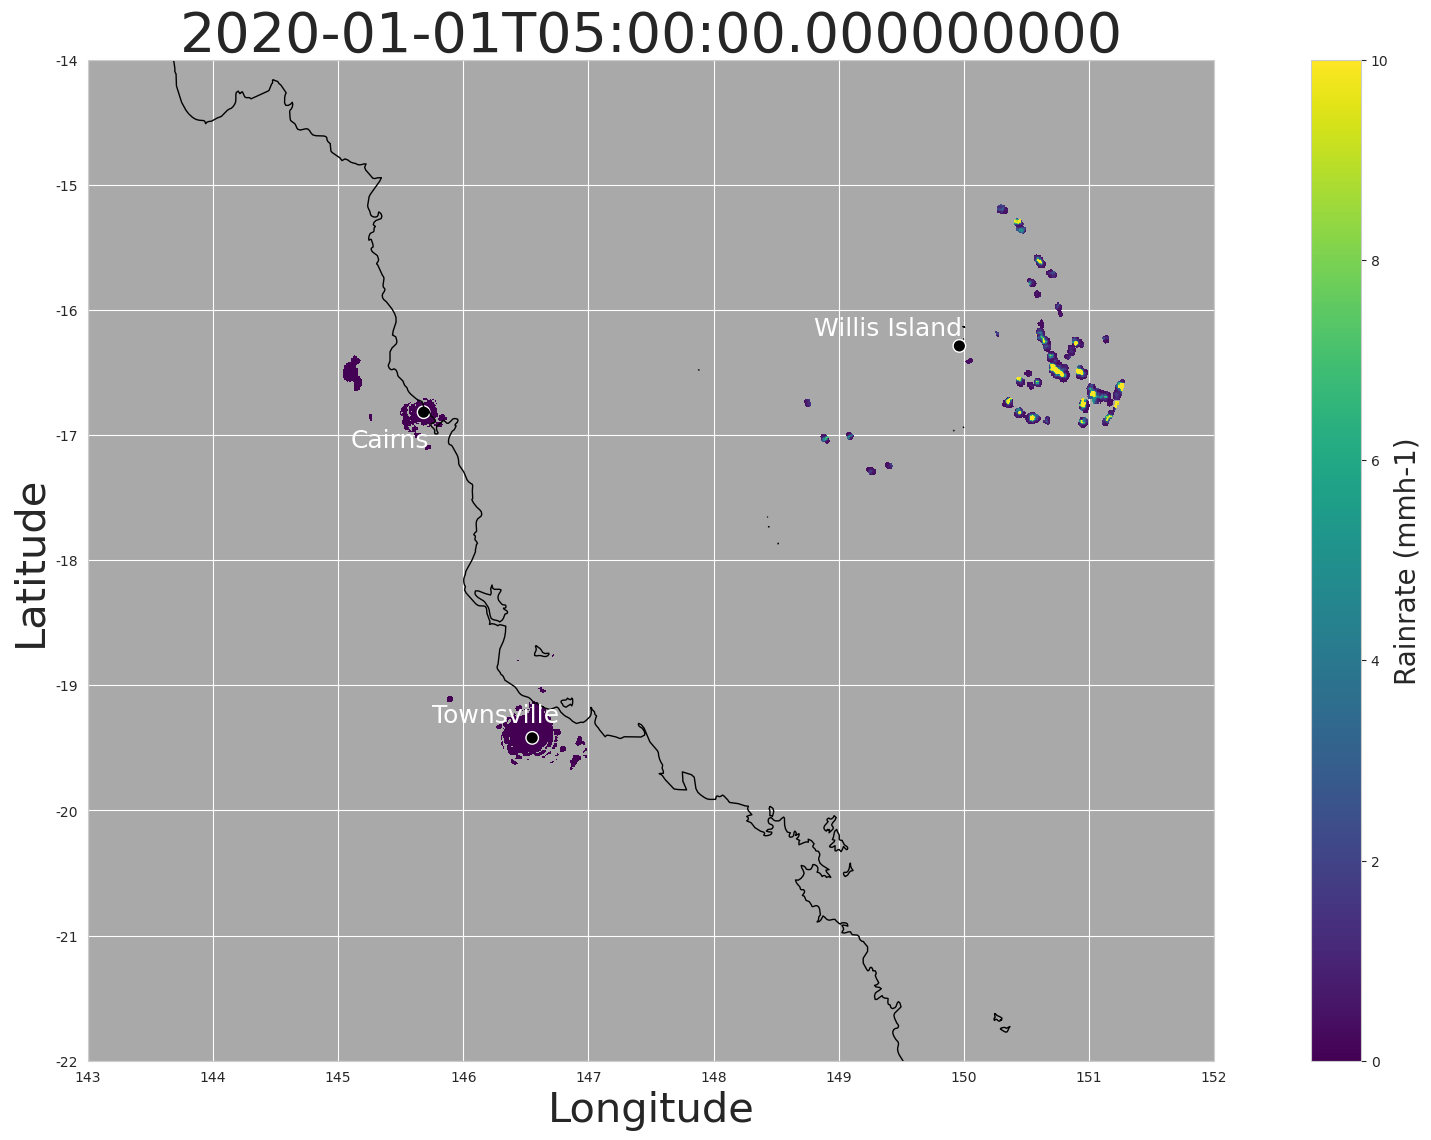

In [55]:
indir = "/home/563/ac9768/plots/radar/"
def radar_field(xbin1,xbin2,xbin3,ybin1,ybin2,ybin3,values1,values2,values3,cmap,units,title,save):#,title1):
    sns.set_style("whitegrid")
    
    fig = plt.figure(1, figsize=[25,13])
    fig.tight_layout()
    ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.set_title(title,loc="center",fontsize=40)#,weight="bold")
    
    # z = 2.5 km
    cs1 = ax.pcolormesh(xbin1,ybin1,values1,cmap=cmap,vmin=0,vmax=10) #vmin vmax set cbar range
    cs2 = ax.pcolormesh(xbin2,ybin2,values2,cmap=cmap,vmin=0,vmax=10)
    cs3 = ax.pcolormesh(xbin3,ybin3,values3,cmap=cmap,vmin=0,vmax=10)
    
    ax.grid(True,color="white")
    circle_T_center = mpatches.Circle((146.5509,-19.4198),0.05,alpha=1,fc="black") # Townsville 
    circle_C_center = mpatches.Circle((145.683,-16.817),0.05,alpha=1,fc="black") # Cairns 
    circle_W_center = mpatches.Circle((149.9646,-16.2874),0.05,alpha=1,fc="black") # Willis Island 
    ax.add_patch(circle_T_center)
    ax.add_patch(circle_C_center)
    ax.add_patch(circle_W_center)
    
    # radar field coverage
    circle_T = mpatches.Circle((146.5509,-19.4198),1.358,alpha=0.2,fc="grey") # Townsville
    circle_C = mpatches.Circle((145.683,-16.817),1.358,alpha=0.2,fc="grey") # Cairns
    circle_W = mpatches.Circle((149.9646,-16.2874),1.358,alpha=0.2,fc="grey") # Willis Island
    # ax.add_patch(circle_T)
    # ax.add_patch(circle_C)
    # ax.add_patch(circle_W)
    
    # radar station name annotations
    ax.annotate("Townsville",(145.75,-19.3),color="white",fontsize=18)
    ax.annotate("Cairns",(145.1,-17.1),color="white",fontsize=18)
    ax.annotate("Willis Island",(148.8,-16.2),color="white",fontsize=18)

    ax.set_xlabel('Longitude',fontsize=30)
    ax.set_ylabel('Latitude',fontsize=30)
    
    ax.set_xticks([143,144,145,146,147,148,149,150,151,152])
    ax.set_xticklabels([143,144,145,146,147,148,149,150,151,152])
    ax.set_yticks([-22,-21,-20,-19,-18,-17,-16,-15,-14])
    ax.set_yticklabels([-22,-21,-20,-19,-18,-17,-16,-15,-14])
    
    ax.set_xlim([143,152])
    ax.set_ylim([-22,-14])
    
    ax.set_facecolor('darkgrey')
    cbar = plt.colorbar(cs1,aspect=20,orientation='vertical',ax=ax)#,ticks=[-5,0,10,20,30,40,50])
    cbar.set_label('Rainrate'+" (%s)"%(units),fontsize=20) 
    #plt.show()
    # plt.savefig(indir+'%s.png'%(save))
    return

lon_T = ds_T.longitude
lon_C = ds_C.longitude
lon_W = ds_W.longitude

lat_T = ds_T.latitude
lat_C = ds_C.latitude
lat_W = ds_W.latitude

dBZ = ds_T.rainrate.units
radar_field(lon_T,lon_C,lon_W,lat_T,lat_C,lat_W,ds_T.rainrate.where(maskT,drop=True).isel(time=30),#.mean(dim="time"),
            ds_C.rainrate.where(maskC,drop=True).isel(time=30),ds_W.rainrate.where(maskW,drop=True).isel(time=30),#.mean(dim="time"),
           "viridis",dBZ,ds_T.time[30].values,ds_T.time[30].values)#"Corrected Reflectivity at 2.5km: 14/02/2022")

# loop to create images for gif

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

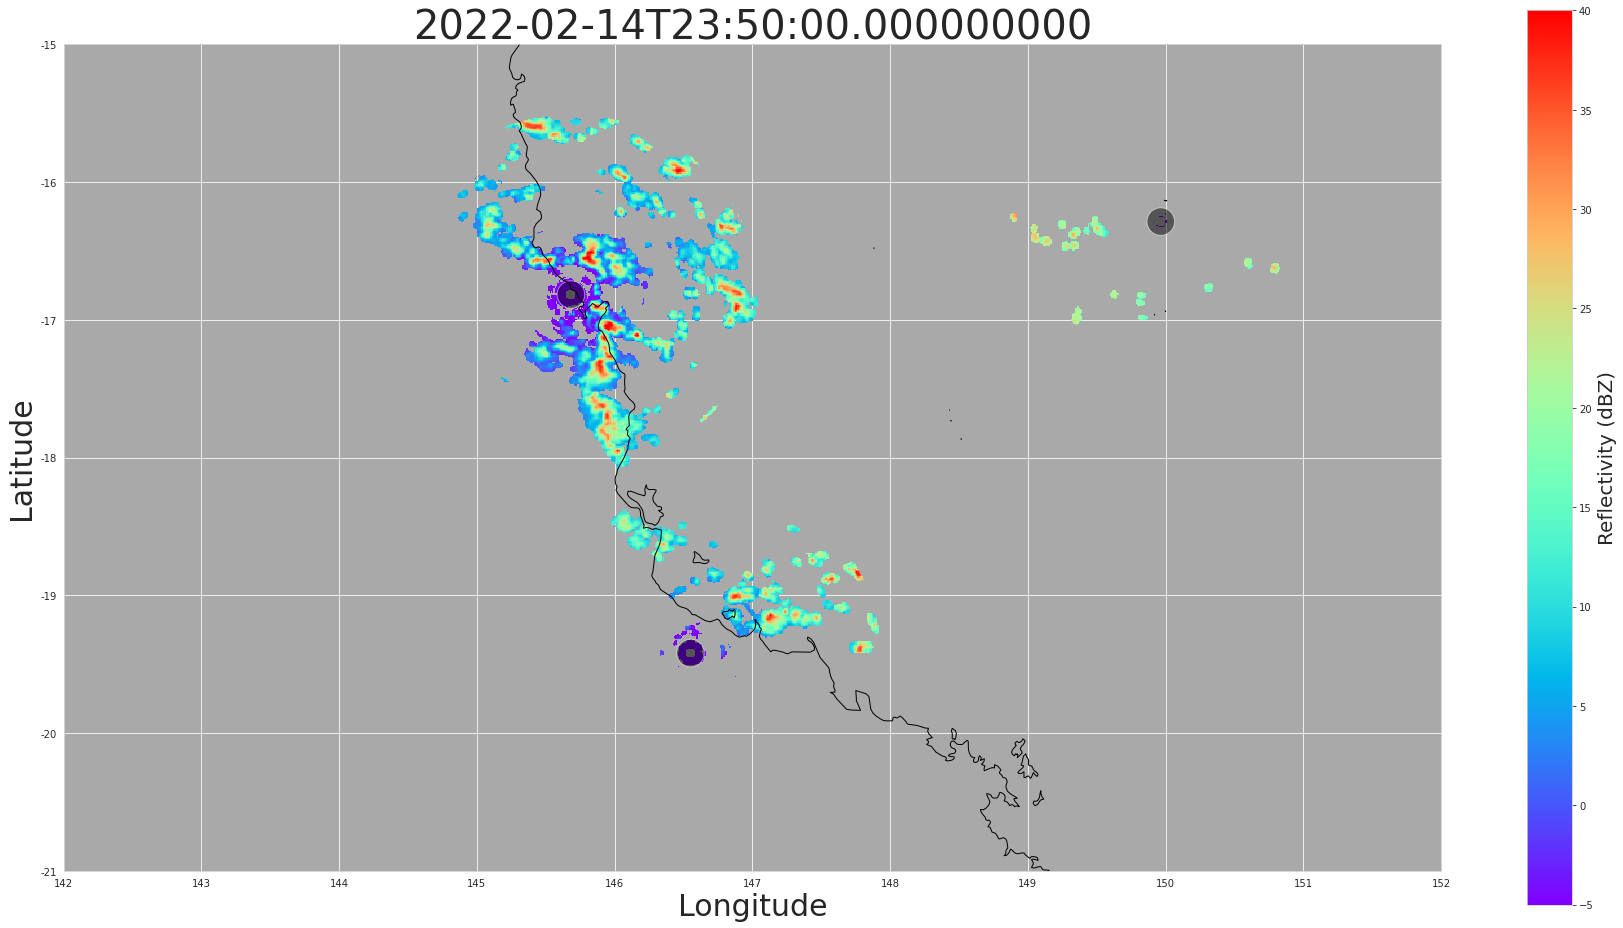

In [21]:
for i in range(0,287):
    radar_field(lon_T,lon_C,lon_W,lat_T,lat_C,lat_W,ds_T.reflectivity.isel(time=i),
            ds_C.reflectivity.isel(time=i),ds_W.reflectivity.isel(time=i),
            "rainbow",dBZ,ds_T.time[i].values,ds_T.time[i].values)
    print(i)